In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-12-15 20:12:44--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-12-15 20:12:44 (30.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
# load in the data
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [4]:
# now split the input and target so lets look at the data
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

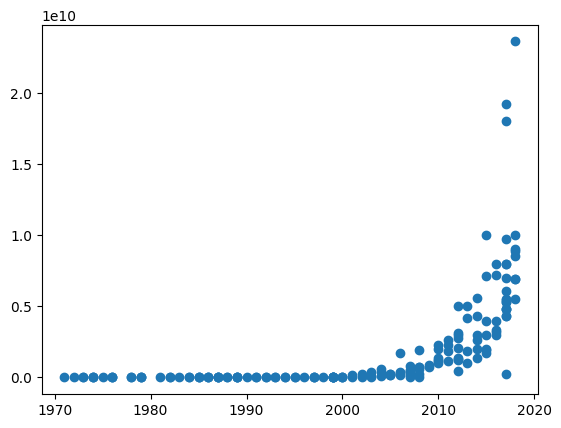

In [5]:
X = data[:,0].reshape(-1,1) # thisn makes an N b D matrix as we're only dealing with 1 colun
Y = data[:,1]
plt.scatter(X,Y)

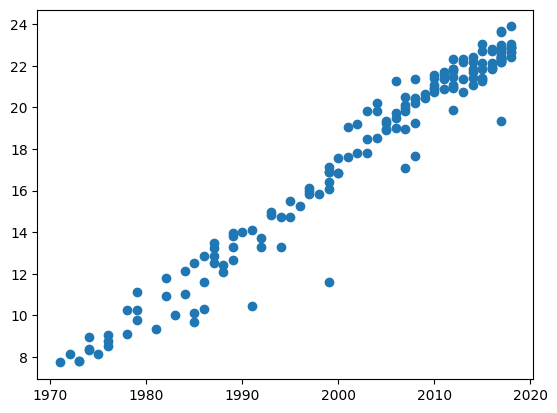

In [6]:
Y = np.log(Y)
plt.scatter(X,Y)

In [7]:
# The inputs start at 1970 and go up to 2020 and this is not good, so we need to translate the data by its mean
# another thing we could do is divide by the standard deviation and this fully standardises the data but we weould have to reverse the standardisation
X = X - X.mean()

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [8]:
model.compile( # as we didn't scale the data, the optimisers need to be custome
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9), #learning rate and momentum
    loss='mse',
)

In [9]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [10]:
r = model.fit(X,Y, epochs = 200, callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 454.3051 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 360.8848 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 316.1464 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 234.1882 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 155.6997 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 112.1797 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83.7804 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60.1964 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.2260 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 33.0413 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27.4481 - learning_rate: 0.0010
Epoch 12/200


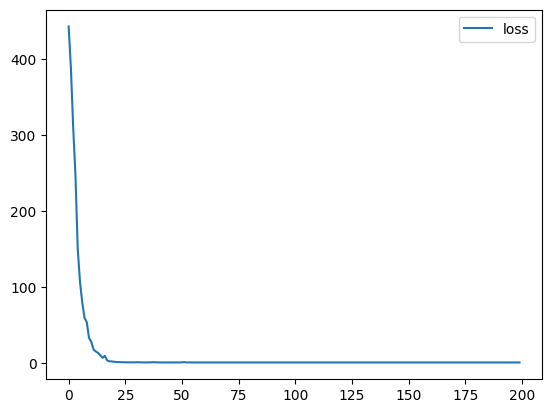

In [11]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [12]:
model.layers

[<Dense name=dense, built=True>]

In [13]:
model.layers[0].get_weights()

[array([[0.3333592]], dtype=float32), array([17.761526], dtype=float32)]

In [14]:
a = model.layers[0].get_weights()[0][0]

In [15]:
print("Time to double: ",np.log(2)/a)

Time to double:  [2.0792801]


In [16]:
X = X.flatten()
denominator = X.dot(X) - X.mean()*X.sum()
a = (X.dot(Y) - Y.mean()*X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) /denominator
print(a,b)

0.341682487387313 17.764939393631764


In [17]:
print("Time to double: ",np.log(2)/a)

Time to double:  2.0286295205239204


# Making Predictions

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


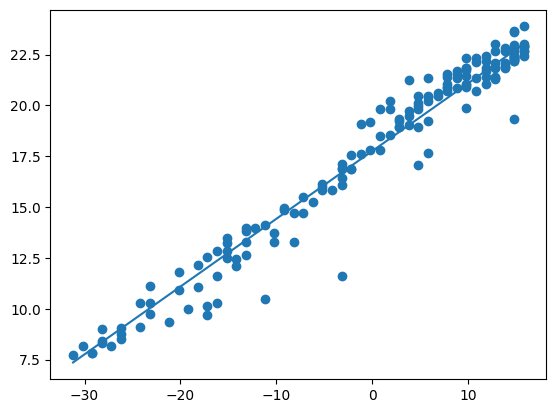

In [18]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [19]:
#calculate the predictions manually

# Get the weights
w,b = model.layers[0].get_weights()
X = X.reshape(-1,1) # to make it 2d as we flattened it earlier
Yhat2 = (X.dot(w) + b).flatten()
np.allclose(Yhat, Yhat2) #as floating point numbers have rounding errors its better to check teh difference

True